<a href="https://colab.research.google.com/github/Md-Jahid-Hasan/Data-Science-AI-ML/blob/master/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Dataset/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop('customerID', axis='columns', inplace=True)

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df = df[df.TotalCharges != ' ']

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


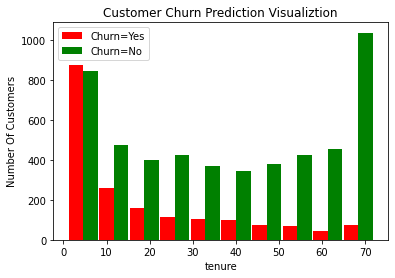

In [ ]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95,
         color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


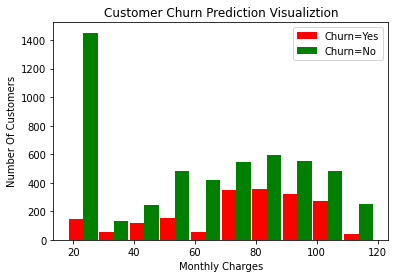

In [ ]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, 
         color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [ ]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [ ]:
df['gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
X = df.drop('Churn', axis='columns')
Y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=5
)

In [ ]:
x_train.shape, x_test.shape

((5625, 26), (1407, 26))

In [ ]:
y_train.shape, y_test.shape

((5625,), (1407,))

In [ ]:
model = keras.Sequential([
      keras.layers.Dense(26, input_shape=(26,), activation='relu'),
      keras.layers.Dense(15, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4948 - accuracy: 0.7675
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.7959
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8044
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8046
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8103
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8100
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8112
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8116
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4041 - accura

**Without Scaler**
(No hidden Layer)
50 epocs = 77%
100 epochs = 76%
(With 1 Hidden Layer)
50 epochs = 77%
100 epocs = 73%

In [ ]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4971 - accuracy: 0.7761


[0.49706441164016724, 0.7761194109916687]

In [ ]:
y_predict = model.predict(x_test)
y_predict[:10]

array([[0.17965874],
       [0.62218463],
       [0.00946406],
       [0.83722013],
       [0.26908556],
       [0.980526  ],
       [0.07992652],
       [0.2977621 ],
       [0.22935843],
       [0.13890511]], dtype=float32)

In [ ]:
y_predict_int = []
for i in y_predict:
  if i > 0.5:
    y_predict_int.append(1)
  else:
    y_predict_int.append(0)

In [ ]:
y_predict_int[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict_int))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.63      0.55      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
def create_ANN_model(X_train, Y_train, X_test, Y_test, loss, weight):
  model = keras.Sequential([
          keras.layers.Dense(26, input_dim=26, activation='relu'),
          keras.layers.Dense(15, activation='relu'),
          keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

  if weight == -1:
    model.fit(X_train, Y_train, epochs=100)
  else:
    model.fit(X_train, Y_train, epochs=100, class_weight=weight)

  print(model.evaluate(X_test, Y_test))
  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)
  print("Classification Report: \n", classification_report(Y_test, y_preds))

  return y_preds

In [ ]:
create_ANN_model(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4721 - accuracy: 0.7700
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7963
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.7979
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8027
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8025
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8059
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8046
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8059
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8080
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4064 - accura

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

**Undersampling -- >** remove some data from big class


In [ ]:
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]

In [ ]:
class_0, class_1 =  df.Churn.value_counts()
class_0, class_1

(5163, 1869)

In [ ]:
df_class_0_underSampling = df_class_0.sample(class_1)
underSampling_data = pd.concat([df_class_0_underSampling, df_class_1], axis=0)
underSampling_data.shape

(3738, 27)

In [ ]:
def train_test(data):
  x = data.drop('Churn', axis='columns')
  y = data['Churn']

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                      random_state=15, stratify=y)
  return x_train, x_test, y_train, y_test

In [ ]:
us_Xtrain, us_Xtest, us_Ytrain, us_Ytest = train_test(underSampling_data)

In [ ]:
us_Xtrain.shape, us_Xtest.shape, us_Ytrain.shape, us_Ytest.shape

((2990, 26), (748, 26), (2990,), (748,))

In [ ]:
us_Ypredict = create_ANN_model(us_Xtrain, us_Ytrain, us_Xtest, us_Ytest,
                               'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6098 - accuracy: 0.6963
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7488
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7589
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7662
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7615
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7639
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7619
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7629
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7692
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7686
Epoch 11/

Method -- > Oversampling

Add some more duplicate value with small class data

In [ ]:
df_class_1_overSampling = df_class_1.sample(class_0, replace=True)
overSampling_data = pd.concat([df_class_1_overSampling, df_class_0],
                              axis=0)
overSampling_data.shape

(10326, 27)

In [ ]:
os_Xtrain, os_Xtest, os_Ytrain, os_Ytest = train_test(overSampling_data)
os_Xtrain.shape, os_Xtest.shape, os_Ytrain.shape, os_Ytest.shape, 

((8260, 26), (2066, 26), (8260,), (2066,))

In [ ]:
os_Ypredict = create_ANN_model(os_Xtrain, os_Ytrain, os_Xtest,
                               os_Ytest, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.7199
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.7653
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7645
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7691
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7701
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7754
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.7776
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7808
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7832
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4583 - accura

Method -->> SMOTE

create dupclicate data using SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE
smot_x = df.drop('Churn', axis='columns')
smot_y = df['Churn']

smote = SMOTE(sampling_strategy='minority')
smot_x, smot_y = smote.fit_sample(smot_x, smot_y)

smot_y

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
smot_Xtrain, smot_Xtest, smot_Ytrain, smot_Ytest = train_test_split(
    smot_x, smot_y, test_size=0.2, random_state=15, stratify=smot_y
    )
smot_Xtrain.shape, smot_Xtest.shape, smot_Ytrain.shape, smot_Ytest.shape

((8260, 26), (2066, 26), (8260,), (2066,))

In [ ]:
smot_Yprediction = create_ANN_model(
    smot_Xtrain, smot_Ytrain, smot_Xtest, smot_Ytest, 'binary_crossentropy', -1)


Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.7337
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7673
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7715
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7749
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7782
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7791
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7815
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.7816
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.7840
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4473 - accura

In [ ]:
ens_Xtrain, ens_Xtest, ens_Ytrain, ens_Ytest = train_test(df)
ens_Xtrain.shape, ens_Xtest.shape, ens_Ytrain.shape, ens_Ytest.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [ ]:
ens_Ytrain.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
ens_test_data = ens_Xtrain.copy()
ens_test_data['Churn'] = ens_Ytrain
ens_test_data.shape

(5625, 27)

In [ ]:
df_ens_class_0 = ens_test_data[ens_test_data.Churn == 0]
df_ens_class_1 = ens_test_data[ens_test_data.Churn == 1]

In [ ]:
def get_train_batch(class_0_data, class_1_data, start, end):
  ens_train = pd.concat([class_0_data[start:end], class_1_data],axis=0)
  x_train = ens_train.drop('Churn', axis='columns')
  y_train =  ens_train.Churn
  return x_train, y_train

In [ ]:
ens_new_Xtrain, ens_new_Ytrain = get_train_batch(
    df_ens_class_0, df_ens_class_1, 0, 1495
)

ens_Ypredicts1 = create_ANN_model(
    ens_new_Xtrain, ens_new_Ytrain, ens_Xtest, ens_Ytest,
    'binary_crossentropy', -1
)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6353 - accuracy: 0.6589
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.7595
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7635
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.7722
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7722
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7709
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7736
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7759
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7776
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7759
Epoch 11/

In [ ]:
ens_new_Xtrain, ens_new_Ytrain = get_train_batch(
    df_ens_class_0, df_ens_class_1, 1495, 2990
)

ens_Ypredicts2 = create_ANN_model(
    ens_new_Xtrain, ens_new_Ytrain, ens_Xtest, ens_Ytest,
    'binary_crossentropy', -1
)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6537 - accuracy: 0.6060
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.7462
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5037 - accuracy: 0.7525
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7535
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7585
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4865 - accuracy: 0.7595
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7632
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7666
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.7645
Epoch 11/

In [ ]:
ens_new_Xtrain, ens_new_Ytrain = get_train_batch(
    df_ens_class_0, df_ens_class_1, 2990, 4130
)

ens_Ypredicts3 = create_ANN_model(
    ens_new_Xtrain, ens_new_Ytrain, ens_Xtest, ens_Ytest,
    'binary_crossentropy', -1
)

Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.6050 - accuracy: 0.7264
Epoch 2/100
83/83 [==============================] - 0s 4ms/step - loss: 0.5080 - accuracy: 0.7658
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.7757
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4786 - accuracy: 0.7780
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7806
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.7810
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.7829
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.7844
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.7863
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.7901
Epoch 11/

In [ ]:
len(ens_Ypredicts1), len(ens_Ypredicts2), len(ens_Ypredicts3)

(1407, 1407, 1407)

In [ ]:
ens_Ypredicts_final = ens_Ypredicts1.copy()

for i in range(len(ens_Ypredicts1)):
  res = ens_Ypredicts1[i] + ens_Ypredicts2[i] + ens_Ypredicts3[i]
  if res > 1:
    ens_Ypredicts_final[i] = 1
  else:
    ens_Ypredicts_final[i] = 0

In [ ]:
print(classification_report)